In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalAveragePooling1D, Flatten
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
# path = '/content/drive/MyDrive/Capstone/'
path = '.'

In [4]:
train_sentences = []
train_labels = []
with open(f"{path}/dataset/train.txt") as f:
    for items in f:
        item = items.split(";")
        train_sentences.append(item[0])
        train_labels.append(item[1].rstrip())

test_sentences = []
test_labels = []
with open(f"{path}/dataset/test.txt") as f:
    for items in f:
        item = items.split(";")
        test_sentences.append(item[0])
        test_labels.append(item[1].rstrip())

val_sentences = []
val_labels = []
with open(f"{path}/dataset/val.txt") as f:
    for items in f:
        item = items.split(";")
        val_sentences.append(item[0])
        val_labels.append(item[1].rstrip())

In [5]:
print(set(train_labels))

{'anger', 'joy', 'love', 'sadness', 'fear', 'surprise'}


In [6]:
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
vocab_size = 5000
max_length = 32
embedding_dim = 64

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index


train_seq = tokenizer.texts_to_sequences(train_sentences)

train_padded = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [7]:
print(train_padded[0])

[  2 139   3 679   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [8]:
val_seq = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
val_padded = np.array(val_padded)

In [9]:
test_seq = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_padded = np.array(test_padded)

In [10]:
labels = list(train_labels)
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
val_label_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    # tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 394,759
Trainable params: 394,759
Non-trainable params: 0
_________________________________________________________________


In [12]:
onehot_train_label = np.squeeze(tf.one_hot(train_label_seq,7).numpy())
onehot_val_label = np.squeeze(tf.one_hot(val_label_seq,7).numpy())
onehot_test_label = np.squeeze(tf.one_hot(test_label_seq,7).numpy())

In [13]:
onehot_test_label[14]

array([0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [14]:
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [15]:
num_epochs = 10

history = model.fit(train_padded, onehot_train_label, epochs=num_epochs, validation_data=(val_padded, onehot_val_label), verbose=1)

Epoch 1/10
500/500 [==============================] - 24s 35ms/step - loss: 1.2194 - accuracy: 0.5209 - val_loss: 0.6703 - val_accuracy: 0.7350
Epoch 2/10
500/500 [==============================] - 16s 32ms/step - loss: 0.4219 - accuracy: 0.8478 - val_loss: 0.3340 - val_accuracy: 0.8880
Epoch 3/10
500/500 [==============================] - 16s 32ms/step - loss: 0.1940 - accuracy: 0.9323 - val_loss: 0.3193 - val_accuracy: 0.8945
Epoch 4/10
500/500 [==============================] - 16s 32ms/step - loss: 0.1368 - accuracy: 0.9517 - val_loss: 0.3064 - val_accuracy: 0.8985
Epoch 5/10
500/500 [==============================] - 16s 32ms/step - loss: 0.0969 - accuracy: 0.9658 - val_loss: 0.3732 - val_accuracy: 0.8935
Epoch 6/10
500/500 [==============================] - 16s 32ms/step - loss: 0.0863 - accuracy: 0.9685 - val_loss: 0.3854 - val_accuracy: 0.8925
Epoch 7/10
500/500 [==============================] - 16s 32ms/step - loss: 0.0700 - accuracy: 0.9758 - val_loss: 0.3817 - val_accuracy:

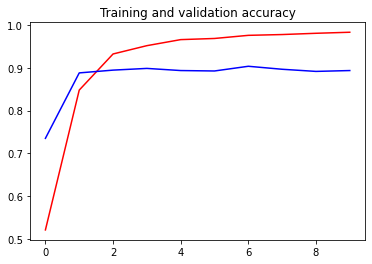

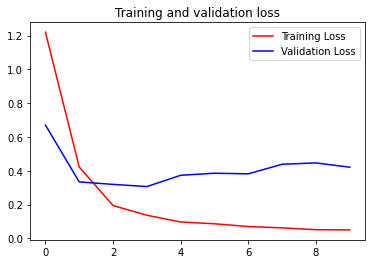

In [16]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

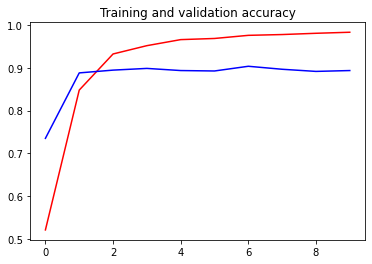

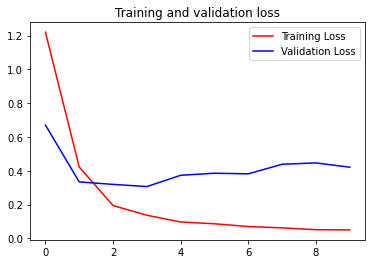

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

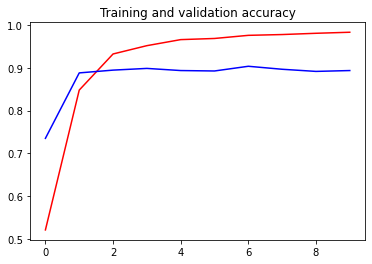

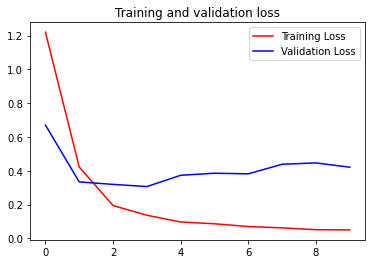

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

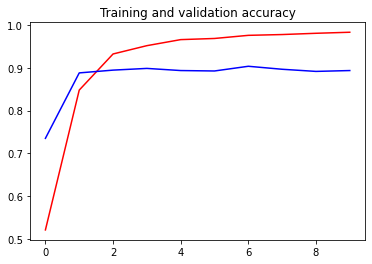

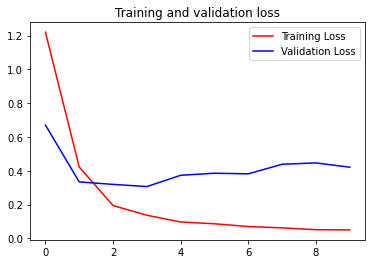

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [21]:
# Now we make predictions using the test data to see how the model performs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
predicted = model.predict(test_padded)
evaluate_preds(np.argmax(onehot_test_label, axis=1), np.argmax(predicted, axis=1))

Acc: 88.70%
Precision: 0.89
Recall: 0.89
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}

In [22]:
predicted[6]

array([1.0557524e-06, 5.1669036e-03, 2.3569044e-02, 8.0032140e-01,
       1.6991058e-01, 5.8535871e-04, 4.4569277e-04], dtype=float32)

1 = joy
2 = sadness
3 = anger
4 = fear
5 = love
6 = surprise

In [23]:
ngetes_seq = tokenizer.texts_to_sequences(['i then feel your tender touch as you enfold me with his love'])
ngetes_padded = pad_sequences(ngetes_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
ngetes_padded = np.array(ngetes_padded)

In [24]:
p = model.predict(ngetes_padded)

In [25]:
p

array([[5.7993527e-10, 2.0802754e-03, 2.5843282e-04, 1.4307262e-05,
        1.1507171e-06, 9.9710304e-01, 5.4271577e-04]], dtype=float32)

In [26]:
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
vocab_size = 5000
max_length = 32
embedding_dim = 64
tokenizer_test = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer_test.fit_on_texts(['i then feel your tender touch as you enfold me with his love i'])
word_index_test = tokenizer_test.word_index


train_seq_test = tokenizer_test.texts_to_sequences(train_sentences)

train_padded_test = pad_sequences(train_seq_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [27]:
print(word_index_test)

{'<OOV>': 1, 'i': 2, 'then': 3, 'feel': 4, 'your': 5, 'tender': 6, 'touch': 7, 'as': 8, 'you': 9, 'enfold': 10, 'me': 11, 'with': 12, 'his': 13, 'love': 14}
